# Домашнее задание «Случайные марковские процессы»

## Задание

1. Скачайте текст произведения «Война и мир»: ссылка на GitHub.  
2. Очистите его, оставив только русские буквы и символы пробела.
3. Постройте матрицу переходных вероятностей.  
4. Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».
5. Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.
6. Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM.
7. Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.

In [2]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

 ## 1. Скачайте текст произведения «Война и мир»: ссылка на GitHub. 

In [5]:
text_all = ['tom_1.txt', 'tom_2.txt', 'tom_3.txt', 'tom_4.txt']

In [7]:
text = ''
for i in text_all:
    with open(i, 'r', encoding='utf-8') as f:
        text += f.read().upper() # поскольку в задании далее упоминания идут про заглавные буквы, то предположил, 
        #что забыли упомянуть про перевод всех букв в верхний регистр. Если не так, то решение сильно не меняется - убирается
        #перевод в верхний регистр

In [9]:
text[0:400]

'ANNOTATION\n\n\nЛЕВ ТОЛСТОЙ\n\nВОЙНА И МИР\n\nТОМ 1\n\n\n\n\n\n* * *\n\n\n\nТОМ IЧАСТЬ ПЕРВАЯI\n\nII\n\nIII\n\nIV\n\nV\n\nVI\n\nVII\n\nVIII\n\nIX\n\nX\n\nXI\n\nXII\n\nXIII\n\nXIV\n\nXV\n\nXVI\n\nXVII\n\nXVIII\n\nXIX\n\nXX\n\nXXI\n\nXXII\n\nXXIII\n\nXXIV\n\nXXV\n\nXXVI\n\nXXVII\n\nXXVIII\n\n\n\n\n\nЧАСТЬ BTОРАЯI\n\nII\n\nIII\n\nIV\n\nV\n\nVI\n\nVII\n\nVIII\n\nIX\n\nX\n\nXI\n\nXII\n\nXIII\n\nXIV\n\nXV\n\nXVI\n\nXVII\n\nXVIII\n\nXIX\n\nXX\n\nXXI\n\n\n\n\n\nЧАСТЬ ТРЕТЬЯI\n\nII\n\nIII\n\nIV\n\nV\n\nVI\n\nVII\n\nVIII\n\nIX\n\nX\n\nXI\n\nXII\n\nXII'

## 2. Очистите его, оставив только русские буквы и символы пробела.

In [12]:
text_filtered = re.sub('[^А-Я ]','', text)

In [14]:
text_filtered[0:400] # интересно, что в фразе ЧАСТЬ ВТОРАЯ буква B латинская:-)

'ЛЕВ ТОЛСТОЙВОЙНА И МИРТОМ   ТОМ ЧАСТЬ ПЕРВАЯЧАСТЬ ОРАЯЧАСТЬ ТРЕТЬЯ  ТОМ ЛЕВ НИКОЛАЕВИЧ ТОЛСТОЙВОЙНА И МИРТОМ ЧАСТЬ ПЕРВАЯ Е              ПОМЕСТЬЯ                                                       МОЙ ВЕРНЫЙ РАБ    НУ ЧТО КНЯЗЬ ГЕНУА И ЛУККА СТАЛИ НЕ БОЛЬШЕ КАК ПОМЕСТЬЯМИ ФАМИЛИИ БОНАПАРТЕ НЕТ Я ВАС ПРЕДУПРЕЖДАЮ ЕСЛИ ВЫ МНЕ НЕ СКАЖЕТЕ ЧТО У НАС ВОЙНА ЕСЛИ ВЫ ЕЩЕ ПОЗВОЛИТЕ СЕБЕ ЗАЩИЩАТЬ ВСЕ ГАДО'

##### Можно обратить внимание на то, что в тексте нет буквы Ё, поэтому далее её исключаем из исследования

In [17]:
t = ''
for i in set(text_filtered):
    t+=i
print('all letters in the text:', t)
RUSSIAN = 'АБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ '
for i in RUSSIAN:
    if i in t:
        continue
    else:
        print('this letter is absent in the text:', i)


all letters in the text: ЬБПСЛ АРЖОЫЪЕЦХЧДМЙЯЮВИТГЭНФЩЗШУК
this letter is absent in the text: Ё


## 3. Постройте матрицу переходных вероятностей.  

In [20]:
RUSSIAN = 'АБВГДЕЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ '
POS = {l: i for i, l in enumerate(RUSSIAN)}

In [22]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [24]:
for cp, cn in zip(text_filtered[:-1], text_filtered[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [25]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [26]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

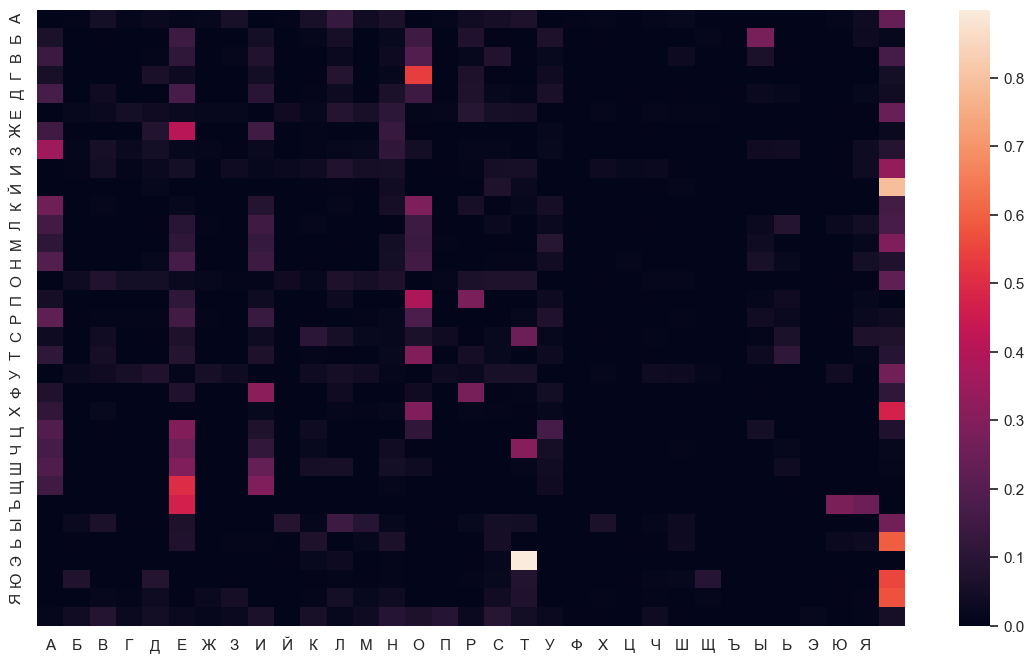

In [27]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

## 4. Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».

In [32]:
# Step 0: Probability that 'П' will be met
j = 0
for i in text:
    if i == 'П':
        j+=1
    else:
        continue
proba_P = j/len(text)
print(proba_P)

0.020234748606524654


In [34]:
# Step 1: Probability to get any letter after 'П' except ' '
proba = 0
for i in RUSSIAN[:-1]:
    proba+=probabilities[POS.get('П'), POS[i]]
print(proba)

0.9983160258209373


In [36]:
# Step 2: probability to get any letter except ' ' after any letter except ' '  multiplied by
# probability from 1st Step.
for i in RUSSIAN[:-1]:
    proba_=0
    for j in RUSSIAN[:-1]:
            proba_+=probabilities[POS[i],POS[j]]
    #print(proba_)
    proba*=proba_ # final proba will be equal to the probability combined with first step
print(proba)

0.00027618842071588023


In [38]:
# Step 3: Probability to get letter 'Р' after any letter except ' '
proba__ = 0
for i in RUSSIAN[:-1]: #POS.get('Р')+1:-1]:
    proba__+=probabilities[POS[i], POS.get('Р')]
print(proba__)
# результат оказался больше 1, поскольку в этом направлении сумма вероятностей не обязательно должна быть = 1

1.1977650642775657


In [40]:
# Step 4: Finidng final probability to see the phrase with 4 letters starting with 'П'and ending with 'Р'
probability_phrase = proba_P*proba*proba__
print('Вероятность встретить строку из 4-х символов П**Р = ', probability_phrase)

Вероятность встретить строку из 4-х символов П**Р =  6.693833744395672e-06


И не совсем корректный метод, который был озвучен на лекции, поскольку не учитывается
вероятность, что фраза начнётся с буквы П и что во фразе не должны быть пробелы

In [43]:
i = 1
result = probabilities
while i<3:
    result=np.matmul(result,probabilities)
    i+=1
print('Probability to start with П and to end with Р:', result[POS.get('П'), POS.get('Р')])

Probability to start with П and to end with Р: 0.03227294750941752


### И самый точный расчёт вероятности встречи П**Р для этого текста)))

In [46]:
j = 0
for i in range(len(text_filtered)):
    if text_filtered[i:i+1] == 'П':
        if text_filtered[i+3:i+4]=='Р':
            if ' ' not in text_filtered[i:i+4]:
                j+=1
                #print(text_filtered[i:i+4])
            else:
                #print(text_filtered[i:i+4])
                continue
        else:
            continue
    else:
        continue
print('П**Р без пробелов встречается',j,'раз')

П**Р без пробелов встречается 3245 раз


In [48]:
print('Самый точный расчёт вероятности встречи П**Р без пробелов. Вероятность =',j/(len(text_filtered)-3))

Самый точный расчёт вероятности встречи П**Р без пробелов. Вероятность = 0.0011742682897261838


## 5. Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.

In [51]:
s = []
start = 'Б'
s.append(start)
length = 7
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    while next_char == ' ':
            next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)
print (''.join(s))

БНОЛАСЕШ
